# Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

!pip install nltk

plt.rcParams["figure.figsize"] = (10,10)

data = json.load(open('xad_tags'))

len(data)

121022

# How the raw data looks like ?

In [2]:
for article in data[:2]:
    print(article)

print(data[0].keys())

{'ID': '105288645', 'Bodytext': '              Bei der        EU-Militärmission „Atalanta“        gegen Piraten am Horn von Afrika werden festgesetzte Seeräuber offenbar mit Essen und Booten versorgt.        Das berichtet die „Bild am Sonntag“        . Demnach wurden auf der deutschen Fregatte „Köln“ mehrere Verdächtige festgesetzt. Sie seien erkennungsdienstlich erfasst und von einem Marine-Stabsarzt untersucht worden. Anschließend hätten sie ein Essenspaket mit Weißbrot, Käse und Wurst sowie mehrere Flaschen Wasser erhalten.      \n                  Nahe der somalischen Küste seien die Piraten wieder von Bord gegangen. Dazu habe ihnen die Besatzung ein altes Marine-Schlauchboot mit Außenbordmotor überlassen. Aus Marinekreisen heißt es: „Eine gerichtliche        Verfolgung ist schwierig        , weil keine Nation Piraten annimmt.“      \n          Der Grünen-Verteidigungsexperte Omid Nouripour forderte, EU und Bundeswehr müssten eindeutig klären, wie mit verdächtigen Piraten und Täter

# Clean the data a little bit

In [3]:
to_be_removed = ['welt_kompakt', 'die_welt', 'wams' 'print_politik',
                 'print' 'newsapp', 'deutschland', 'ausland', 'hamburg', 'wirtschaft']

for article in data:
    categories_for_article = article['Categories']
    text = article['Introtext']
    
    if len(categories_for_article) == 1 and "." in categories_for_article[0]:
        categories_for_article[0] = ''
        
    if len(categories_for_article) >= 1: 
        for current_category in categories_for_article:
            if current_category in to_be_removed:
                categories_for_article.remove(current_category)
                
    for index, category in enumerate(categories_for_article):
        if "_" in category:
            splitted = category.split("_")
            categories_for_article[index] = splitted[1] 

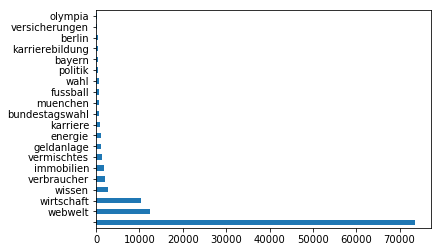

In [4]:
from nltk.stem.snowball import SnowballStemmer

stopwords = {
    "a":          True,
	"aber":       True,
	"ab":         True,
	"alle":       True,
	"allem":      True,
	"allen":      True,
	"aller":      True,
	"allerdings": True,
	"alles":      True,
	"als":        True,
	"also":       True,
	"außerdem":   True,
	"am":         True,
	"an":         True,
	"ander":      True,
	"andere":     True,
	"anderem":    True,
	"anderen":    True,
	"anderer":    True,
	"anderes":    True,
	"anderm":     True,
	"andern":     True,
	"anders":     True,
	"auch":       True,
	"auf":        True,
	"aus":        True,
	"bei":        True,
	"beiden":     True,
	"bin":        True,
	"bis":        True,
	"bist":       True,
	"bald":       True,
	"beim":       True,
	"da":         True,
	"davon":      True,
	"damit":      True,
	"dann":       True,
	"das":        True,
	"damals":     True,
	"dass":       True,
	"dasselbe":   True,
	"dazu":       True,
	"daß":        True,
	"dein":       True,
	"dabei":      True,
	"deine":      True,
	"deinem":     True,
	"deinen":     True,
	"deiner":     True,
	"deines":     True,
	"dem":        True,
	"demselben":  True,
	"den":        True,
	"denn":       True,
	"denselben":  True,
	"der":        True,
	"derer":      True,
	"derselbe":   True,
	"derselben":  True,
	"dadurch":    True,
	"des":        True,
	"desselben":  True,
	"dessen":     True,
	"dich":       True,
	"die":        True,
	"dies":       True,
	"dafür":      True,
	"diese":      True,
	"denen":      True,
	"dieselbe":   True,
	"deswegen":   True,
	"dieselben":  True,
	"diesem":     True,
	"diesen":     True,
	"dieser":     True,
	"dieses":     True,
	"dir":        True,
	"doch":       True,
	"darf":       True,
	"datum":      True,
	"darunter":   True,
	"dort":       True,
	"du":         True,
	"durch":      True,
	"deutschen":  True,
	"ein":        True,
	"eine":       True,
	"einem":      True,
	"einen":      True,
	"einer":      True,
	"eines":      True,
	"einig":      True,
	"einige":     True,
	"einigem":    True,
	"einigen":    True,
	"einiger":    True,
	"einiges":    True,
	"erst":       True,
	"ende":       True,
	"einmal":     True,
	"eigentlich": True,
	"er":         True,
	"es":         True,
	"etwas":      True,
	"etwa":       True,
	"euch":       True,
	"euer":       True,
	"eure":       True,
	"euro":       True,
	"eurem":      True,
	"endlich":    True,
	"euren":      True,
	"eurer":      True,
	"eures":      True,
	"für":        True,
	"gegen":      True,
	"gibt":       True,
	"ganz":       True,
	"gut":        True,
	"gewesen":    True,
	"gar":        True,
	"gerade":     True,
	"geworden":   True,
	"geht":       True,
	"hab":        True,
	"habe":       True,
	"haben":      True,
	"hat":        True,
	"hätte":      True,
	"hätten":     True,
	"hatte":      True,
	"hatten":     True,
	"hier":       True,
	"hin":        True,
	"hinter":     True,
	"ich":        True,
	"ihm":        True,
	"ihn":        True,
	"ihnen":      True,
	"ihr":        True,
	"ihre":       True,
	"ihrem":      True,
	"ihren":      True,
	"immer":      True,
	"ihrer":      True,
	"ihres":      True,
	"im":         True,
	"in":         True,
	"indem":      True,
	"ins":        True,
	"ist":        True,
	"jede":       True,
	"jedem":      True,
	"jeden":      True,
	"jeder":      True,
	"jedes":      True,
	"jene":       True,
	"jenem":      True,
	"jenen":      True,
	"jener":      True,
	"jenes":      True,
	"jetzt":      True,
	"kann":       True,
	"kein":       True,
	"keine":      True,
	"keinem":     True,
	"keinen":     True,
	"konnte":     True,
	"keiner":     True,
	"keines":     True,
	"können":     True,
	"könnte":     True,
	"klein":      True,
	"kürze":      True,
	"kurz":       True,
	"kürzem":     True,
	"mal":        True,
	"machen":     True,
	"man":        True,
	"manche":     True,
	"manchem":    True,
	"manchen":    True,
	"mancher":    True,
	"manches":    True,
	"mein":       True,
	"menschen":   True,
	"millionen":  True,
	"meine":      True,
	"meinem":     True,
	"meinen":     True,
	"meisten":    True,
	"meiner":     True,
	"müssen":     True,
	"mehr":       True,
	"meines":     True,
	"mann":       True,
	"mich":       True,
	"mir":        True,
	"mit":        True,
	"muss":       True,
	"musste":     True,
	"mutter":     True,
	"monat":      True,
	"land":       True,
	"trotzdem":   True,
	"liegt":      True,
	"nach":       True,
	"neuen":      True,
	"nicht":      True,
	"nichts":     True,
	"noch":       True,
	"nun":        True,
	"nur":        True,
	"pro":        True,
	"ob":         True,
	"oft":        True,
	"öfter":      True,
	"oder":       True,
	"ohne":       True,
	"sehr":       True,
	"sein":       True,
	"seit":       True,
	"seine":      True,
	"sagt":       True,
	"sagte":      True,
	"seinem":     True,
	"seinen":     True,
	"seiner":     True,
	"seines":     True,
	"selbst":     True,
	"schon":      True,
	"sich":       True,
	"sie":        True,
	"sind":       True,
	"so":         True,
	"solche":     True,
	"solchem":    True,
	"sogar":      True,
	"solchen":    True,
	"solcher":    True,
	"solches":    True,
	"soll":       True,
	"sollte":     True,
	"sollen":     True,
	"steht":      True,
	"sei":        True,
	"sondern":    True,
	"sonst":      True,
	"stadt":      True,
	"tagen":      True,
	"trainer":    True,
	"tages":      True,
	"rund":       True,
	"um":         True,
	"und":        True,
	"uns":        True,
	"unser":      True,
	"unsere":     True,
	"prozent":    True,
	"president":  True,
	"unserem":    True,
	"unseren":    True,
	"unserer":    True,
	"unseres":    True,
	"unter":      True,
	"viel":       True,
	"viele":      True,
	"vater":      True,
	"vom":        True,
	"von":        True,
	"vor":        True,
	"war":        True,
	"waren":      True,
	"warst":      True,
	"was":        True,
	"weg":        True,
	"weil":       True,
	"weiter":     True,
	"welche":     True,
	"welchem":    True,
	"welchen":    True,
	"welcher":    True,
	"welches":    True,
	"wenn":       True,
	"wenig":      True,
	"werde":      True,
	"werden":     True,
	"wie":        True,
	"wieder":     True,
	"will":       True,
	"wir":        True,
	"wird":       True,
	"wirst":      True,
	"warum":      True,
	"wegen":      True,
	"wurde":      True,
	"wo":         True,
	"wäre":       True,
	"wollen":     True,
	"wollte":     True,
	"während":    True,
	"wer":        True,
	"wem":        True,
	"würde":      True,
	"würden":     True,
	"zu":         True,
	"zum":        True,
	"zur":        True,
	"zwar":       True,
	"zwischen":   True,
	"über":       True,
	"jahr":       True,
	"jahre":      True,
	"jahren":     True,
	"frau":       True,
	"frauen":     True,
}

stemmer = SnowballStemmer("german")

keys = ['Introtext', 'Categories']

df = pd.DataFrame(data, columns=keys)

df['Introtext'].replace('', np.nan, inplace=True)
df['Categories'].replace('', np.nan, inplace=True)

df.dropna(inplace=True)

def to_s(categories):
    return ''.join(categories)

def to_lowercase(text):
    return text.lower()

def remove_stopwords(text):
    result = []
    
    splitted = text.split(" ")
    
    for word in splitted:
        if word not in stopwords.keys():
            result.append(" " + stemmer.stem(word))
    
    return "".join(result)
            
df['Categories'] = df['Categories'].apply(to_s)

filtered = df.groupby('Categories').filter(lambda x: len(x) >= 250)

df['Introtext'] = df['Introtext'].apply(to_lowercase)
df['Introtext'] = df['Introtext'].apply(remove_stopwords)

pd.value_counts(filtered['Categories']).plot(kind='barh')

#g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

# Prepare training and test data

In [5]:
train_size = int(len(filtered) * .8)
train_articles = filtered['Introtext'][:train_size]
train_categories = filtered['Categories'][:train_size]
test_articles = filtered['Introtext'][train_size:]
test_categories = filtered['Categories'][train_size:]
num_labels = pd.value_counts(train_categories).size

print(train_articles.shape)
print(train_articles.ndim)

(89946,)
1


# Tokenize and prepare to data to feed into the neural network

In [6]:
from keras.preprocessing.text import Tokenizer

vocabulary_size = 20000

tokenize = Tokenizer(num_words=vocabulary_size, lower=True)

tokenize.fit_on_texts(train_articles)

x_train = tokenize.texts_to_matrix(train_categories)

Using TensorFlow backend.


In [7]:
from sklearn import preprocessing
encoder = preprocessing.LabelBinarizer()

encoder.fit(train_categories)

y_train = encoder.transform(train_categories)
y_test = encoder.transform(test_categories)

# Train...

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(512, input_shape=(vocabulary_size,)))
model.add(Activation('relu'))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

batch_size = 64
  
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=3, 
                    verbose=1,
                    validation_split=0.1)

Train on 80951 samples, validate on 8995 samples
Epoch 1/3
80951/80951 [==============================] - 122s 2ms/step - loss: 0.5893 - acc: 0.8556 - val_loss: 0.4733 - val_acc: 0.8617
Epoch 2/3
80951/80951 [==============================] - 122s 2ms/step - loss: 0.4637 - acc: 0.8646 - val_loss: 0.4738 - val_acc: 0.8617
Epoch 3/3
80951/80951 [==============================] - 122s 2ms/step - loss: 0.4634 - acc: 0.8646 - val_loss: 0.4752 - val_acc: 0.8617


# Let's try it out

In [9]:
text_labels = encoder.classes_

for ctr in range(25):    
    prediction = model.predict(np.array([x_train[ctr]]))
    predicted_label = text_labels[np.argmax(prediction[0])]
    print(test_articles.iloc[ctr][:80], "..")
    print('Real category: ' + test_categories.iloc[ctr])
    print("Predicted category: " + predicted_label)

Die Integrationsbeauftragte Aydan Özoguz (SPD) wirft der CSU nach deren Parteita ..
Real category: 
Predicted category: 
Der Bundespräsident ist zum Antrittsbesuch in Israel eingetroffen. Mit Spannung  ..
Real category: 
Predicted category: energie
127.023 Asyl-Anträge wurden im vergangenen Jahr gestellt – eine Steigerung gegen ..
Real category: 
Predicted category: 
Die Smart Watch aus Italien ist in unserem Test nur bedingt einsatzbereit. Keine ..
Real category: webwelt
Predicted category: 
Für eine Lösung des Konflikts in der Ukraine setzt die Bundesregierung auf inter ..
Real category: 
Predicted category: wissen
Die ukrainische Armee steht im Ruf, extrem schlecht ausgestattet zu sein. Jetzt  ..
Real category: 
Predicted category: 
Ein US-Sender verfilmte Sarah Palins schrägen Wahlkampf 2008 an der Seite von Jo ..
Real category: 
Predicted category: 
Ein mutiger Journalist versucht im zerrütteten Simbabwe, die erste unabhängige T ..
Real category: politik
Predicted category: verbra